In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/weatherAUS2.csv')
print(df.shape)

(145460, 23)


In [4]:
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: xlabel='RainTomorrow', ylabel='count'>

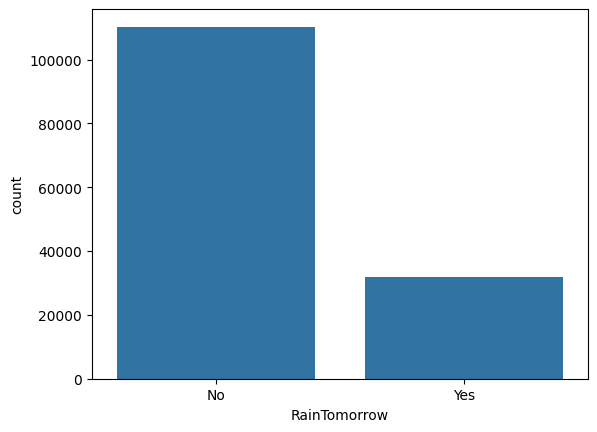

In [6]:
sns.countplot(x="RainTomorrow", data = df)

In [7]:
cat_cols = df.select_dtypes(exclude = np.number).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df[cat_cols].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [9]:
num_cols = df.select_dtypes(include=np.number).columns
temp_df = df[num_cols]
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [10]:
temp_df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
temp_df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

Text(0.5, 1.0, 'Feature correlation')

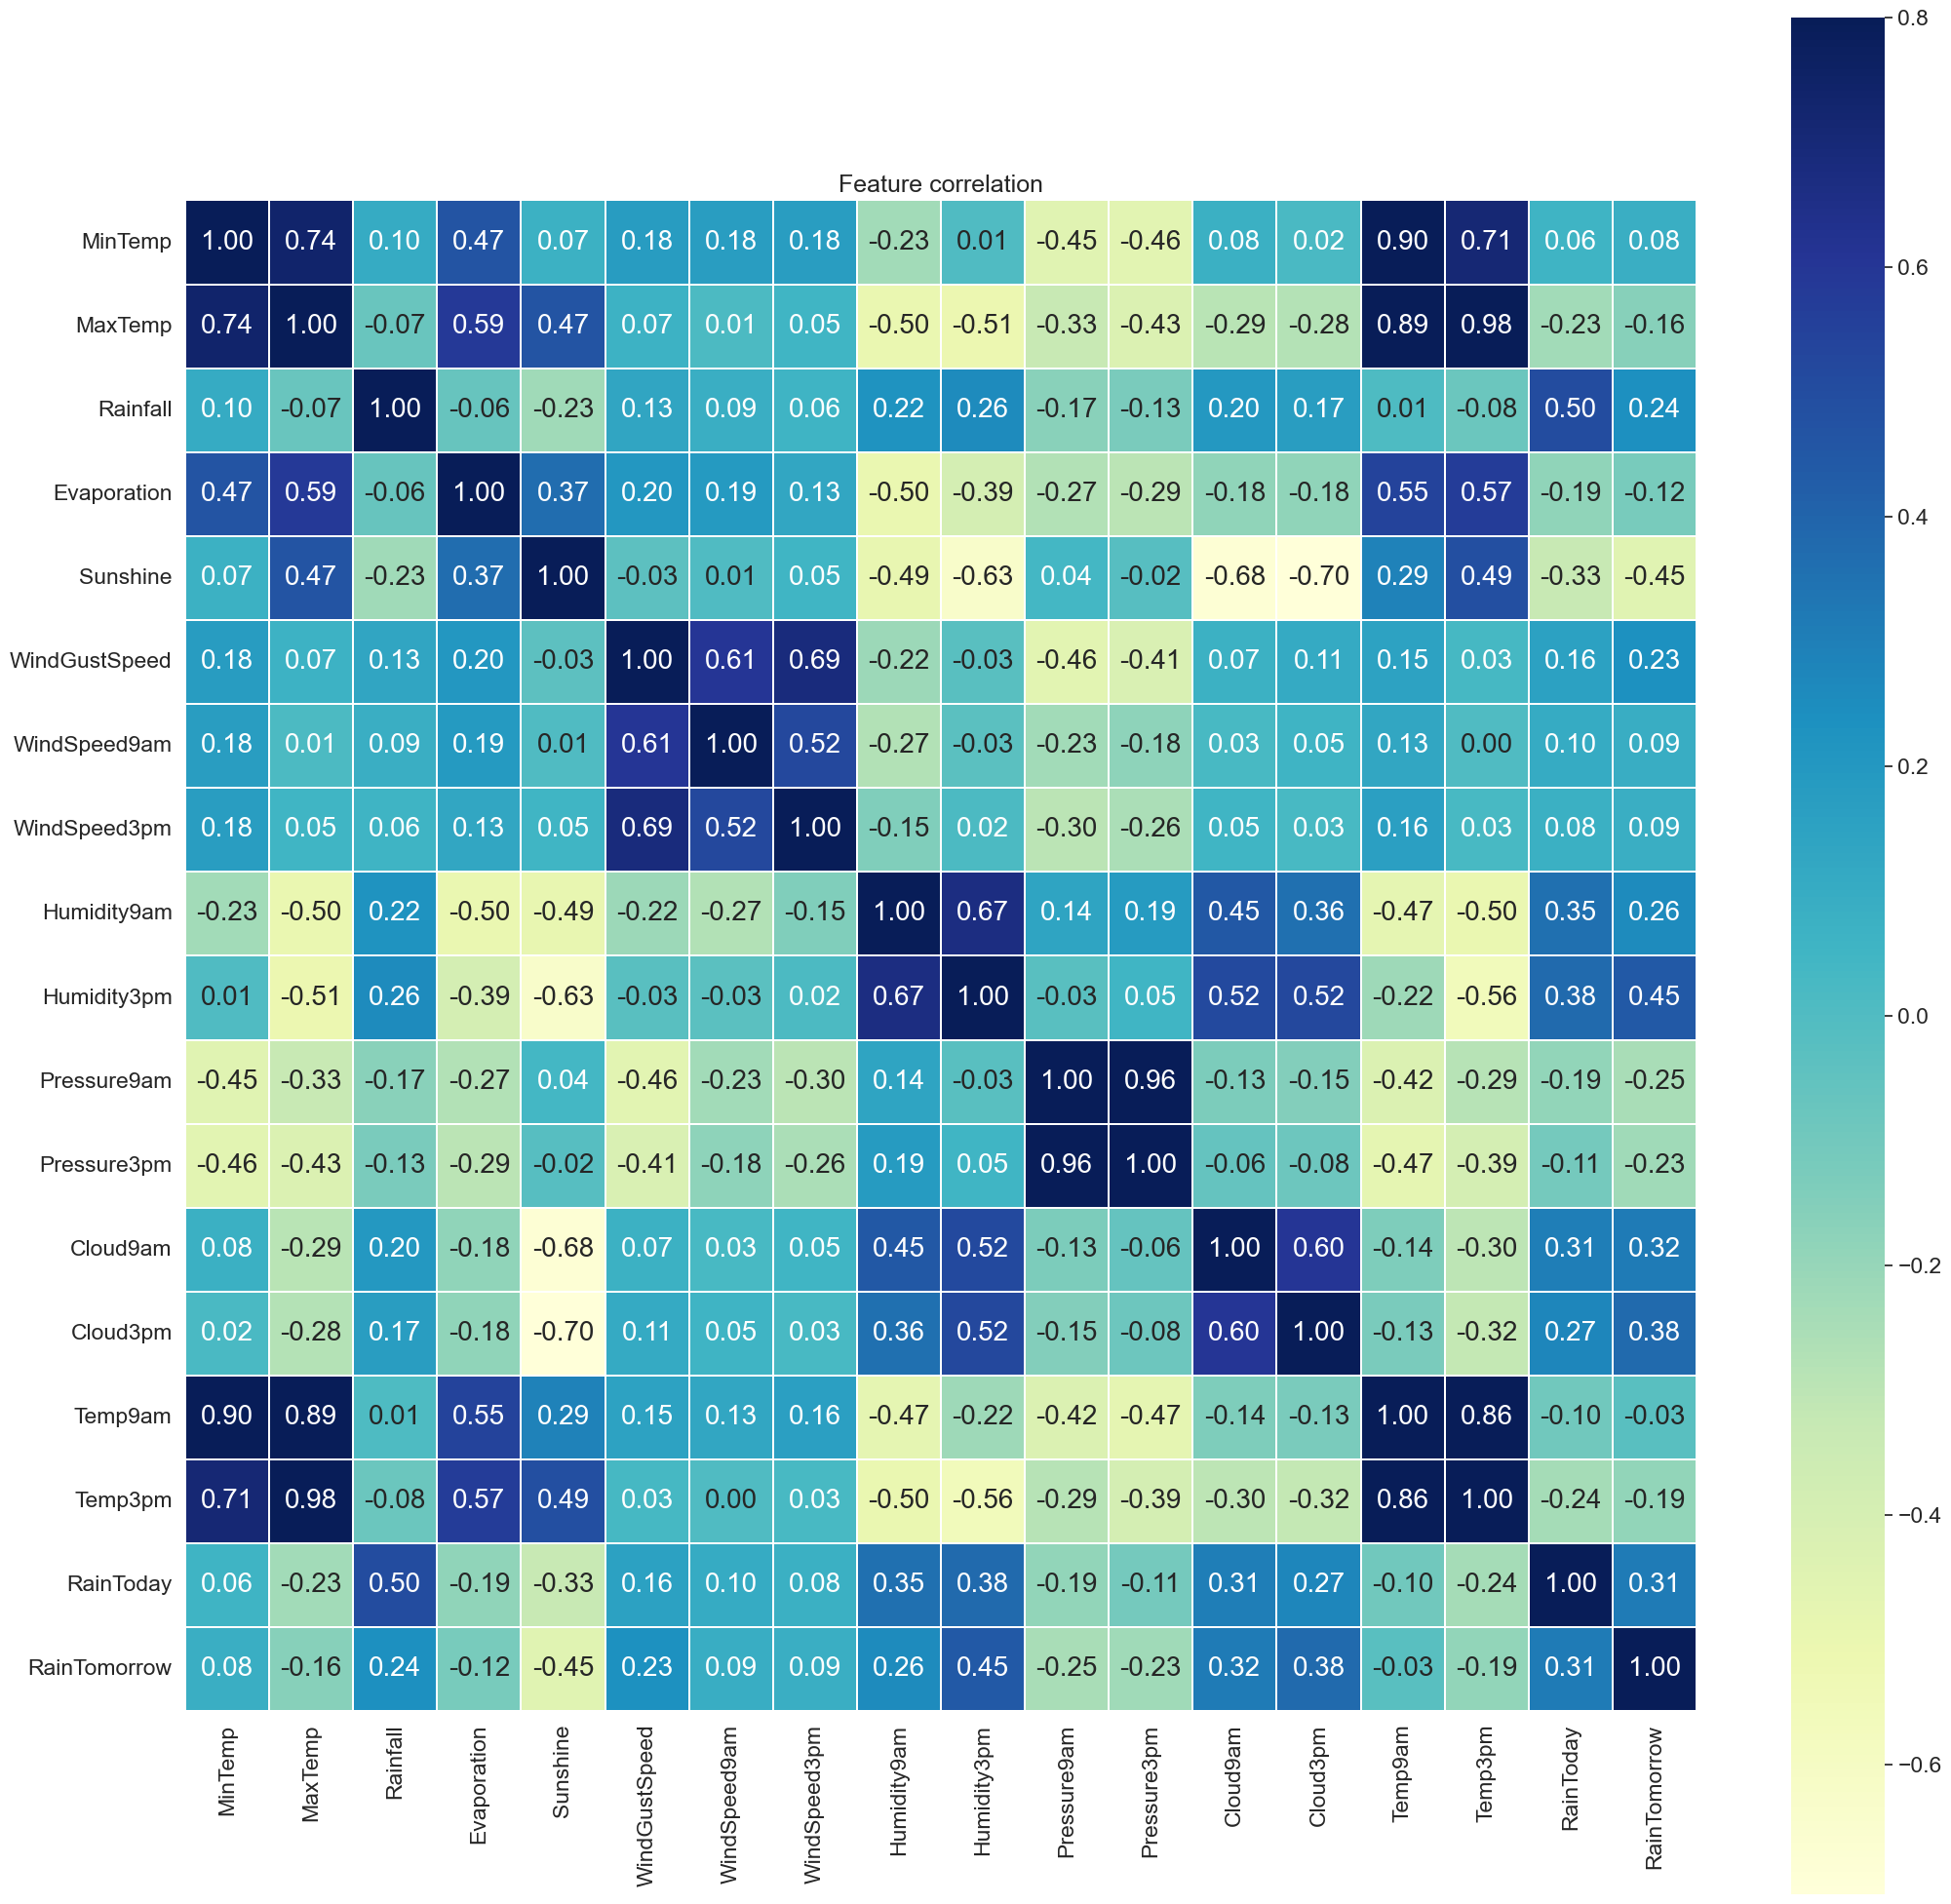

In [11]:
corr = temp_df.corr()
plt.figure(figsize=(25,25))
sns.set(font_scale=1.5)
sns.heatmap(corr,
            vmax = 0.8,
            linewidths=0.01,
            square= True,
            annot = True,
            fmt = '.2f',
            annot_kws = {"size":20},
            cmap = 'YlGnBu')
plt.title('Feature correlation')

In [12]:
corr.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
print(corr['RainTomorrow'].sort_values(ascending = False))

RainTomorrow     1.000000
Humidity3pm      0.446160
Cloud3pm         0.381870
Cloud9am         0.317380
RainToday        0.313097
Humidity9am      0.257161
Rainfall         0.239032
WindGustSpeed    0.234010
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
Temp9am         -0.025691
Evaporation     -0.119285
MaxTemp         -0.159237
Temp3pm         -0.192424
Pressure3pm     -0.226031
Pressure9am     -0.246371
Sunshine        -0.450768
Name: RainTomorrow, dtype: float64


<Axes: ylabel='Sunshine'>

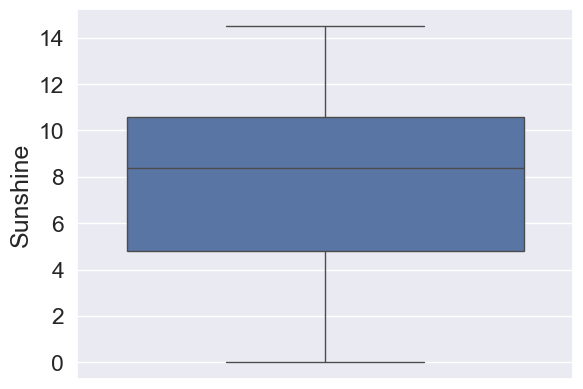

In [18]:
sns.boxplot(data=df, y= 'Sunshine')

In [19]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

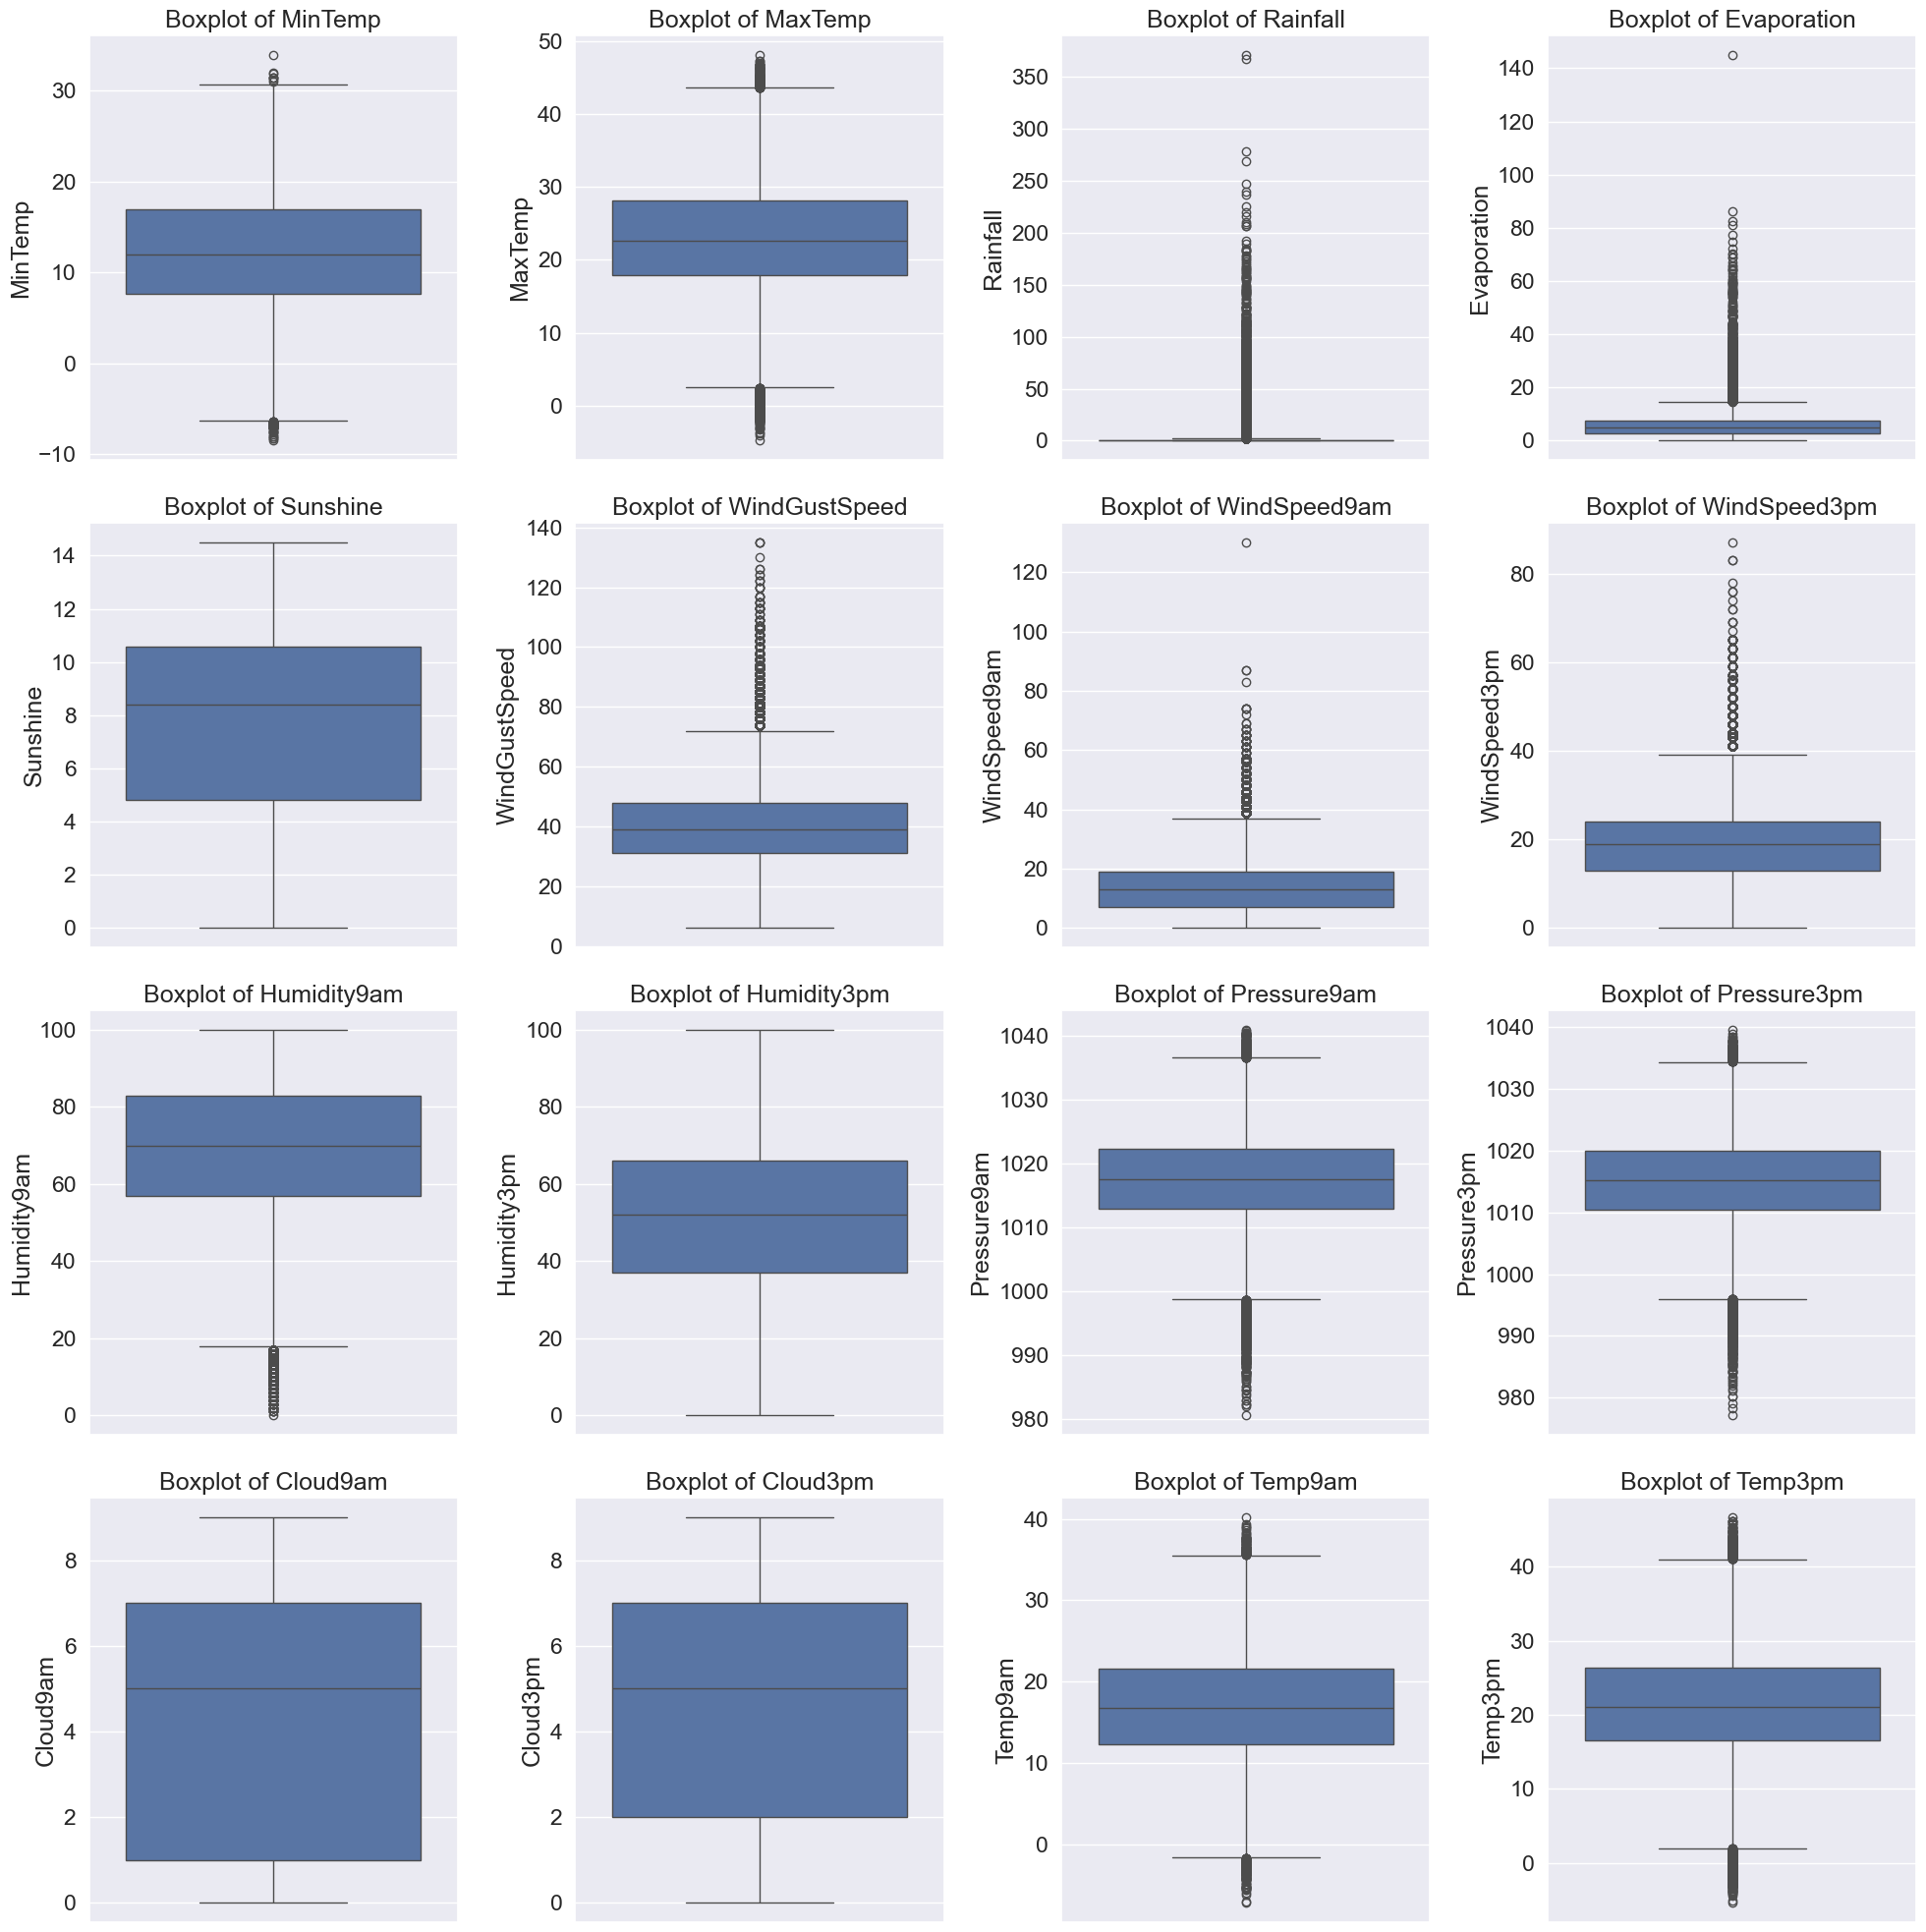

In [20]:
nrows, ncols = 4,4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20)

axs = axs.flatten()

for i , col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()

## Rainfall 컬럼에서 0이 아닌것만 필터링

In [21]:
filtered_rainfall = df.query('Rainfall != 0.0').copy()

In [22]:
filtered_rainfall.shape

(54380, 23)

In [23]:
df = pd.read_csv('data/weatherAUS2.csv')
print(df.shape)

(145460, 23)


In [24]:
# 이상치 확인하는 함수
def get_outlier_indices(data, columns):
    outlier_indices = []   # 이상치에 해당하는 행의 목록 리스트
    for column in columns:
        Q1 = data[column].quantile(0.25) # 25%분위수(1Q)
        Q3 = data[column].quantile(0.75) # 75%분위수(3Q)
        IQR = Q3 - Q1
        min_value = Q1 - 1.5*IQR
        max_value = Q3 + 1.5*IQR
        filter = ((data[column] < min_value) | (data[column] > max_value))  
        
        outlier_data = data[column][filter]
        outlier_index = outlier_data.index
        outlier_indices.extend(outlier_index)

    return outlier_indices

In [25]:
# Rainfall 컬럼의 이상치에 해당하는 모든 row 데이터 idex 값을 추출
print('dataframe before removing outlier (Rainfall column) :', df.shape)
delete_indices = get_outlier_indices(filtered_rainfall, ['Rainfall'])
# print(delete_indices)

dataframe before removing outlier (Rainfall column) : (145460, 23)


In [26]:
# Rainfall 의 이상치 삭제
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (Rainfall column) :', df.shape)

dataframe after removing outlier (Rainfall column) : (140240, 23)


In [27]:
# 'Humidity9am','Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm' 이상치 제거
print('dataframe before removing outlier (etc) :', df.shape)
delete_indices = get_outlier_indices(df, ['Humidity9am','Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm'])

dataframe before removing outlier (etc) : (140240, 23)


In [28]:
# 컬럼에서 추출한 이상치를 삭제하기
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (etc) :', df.shape)

dataframe after removing outlier (etc) : (133529, 23)


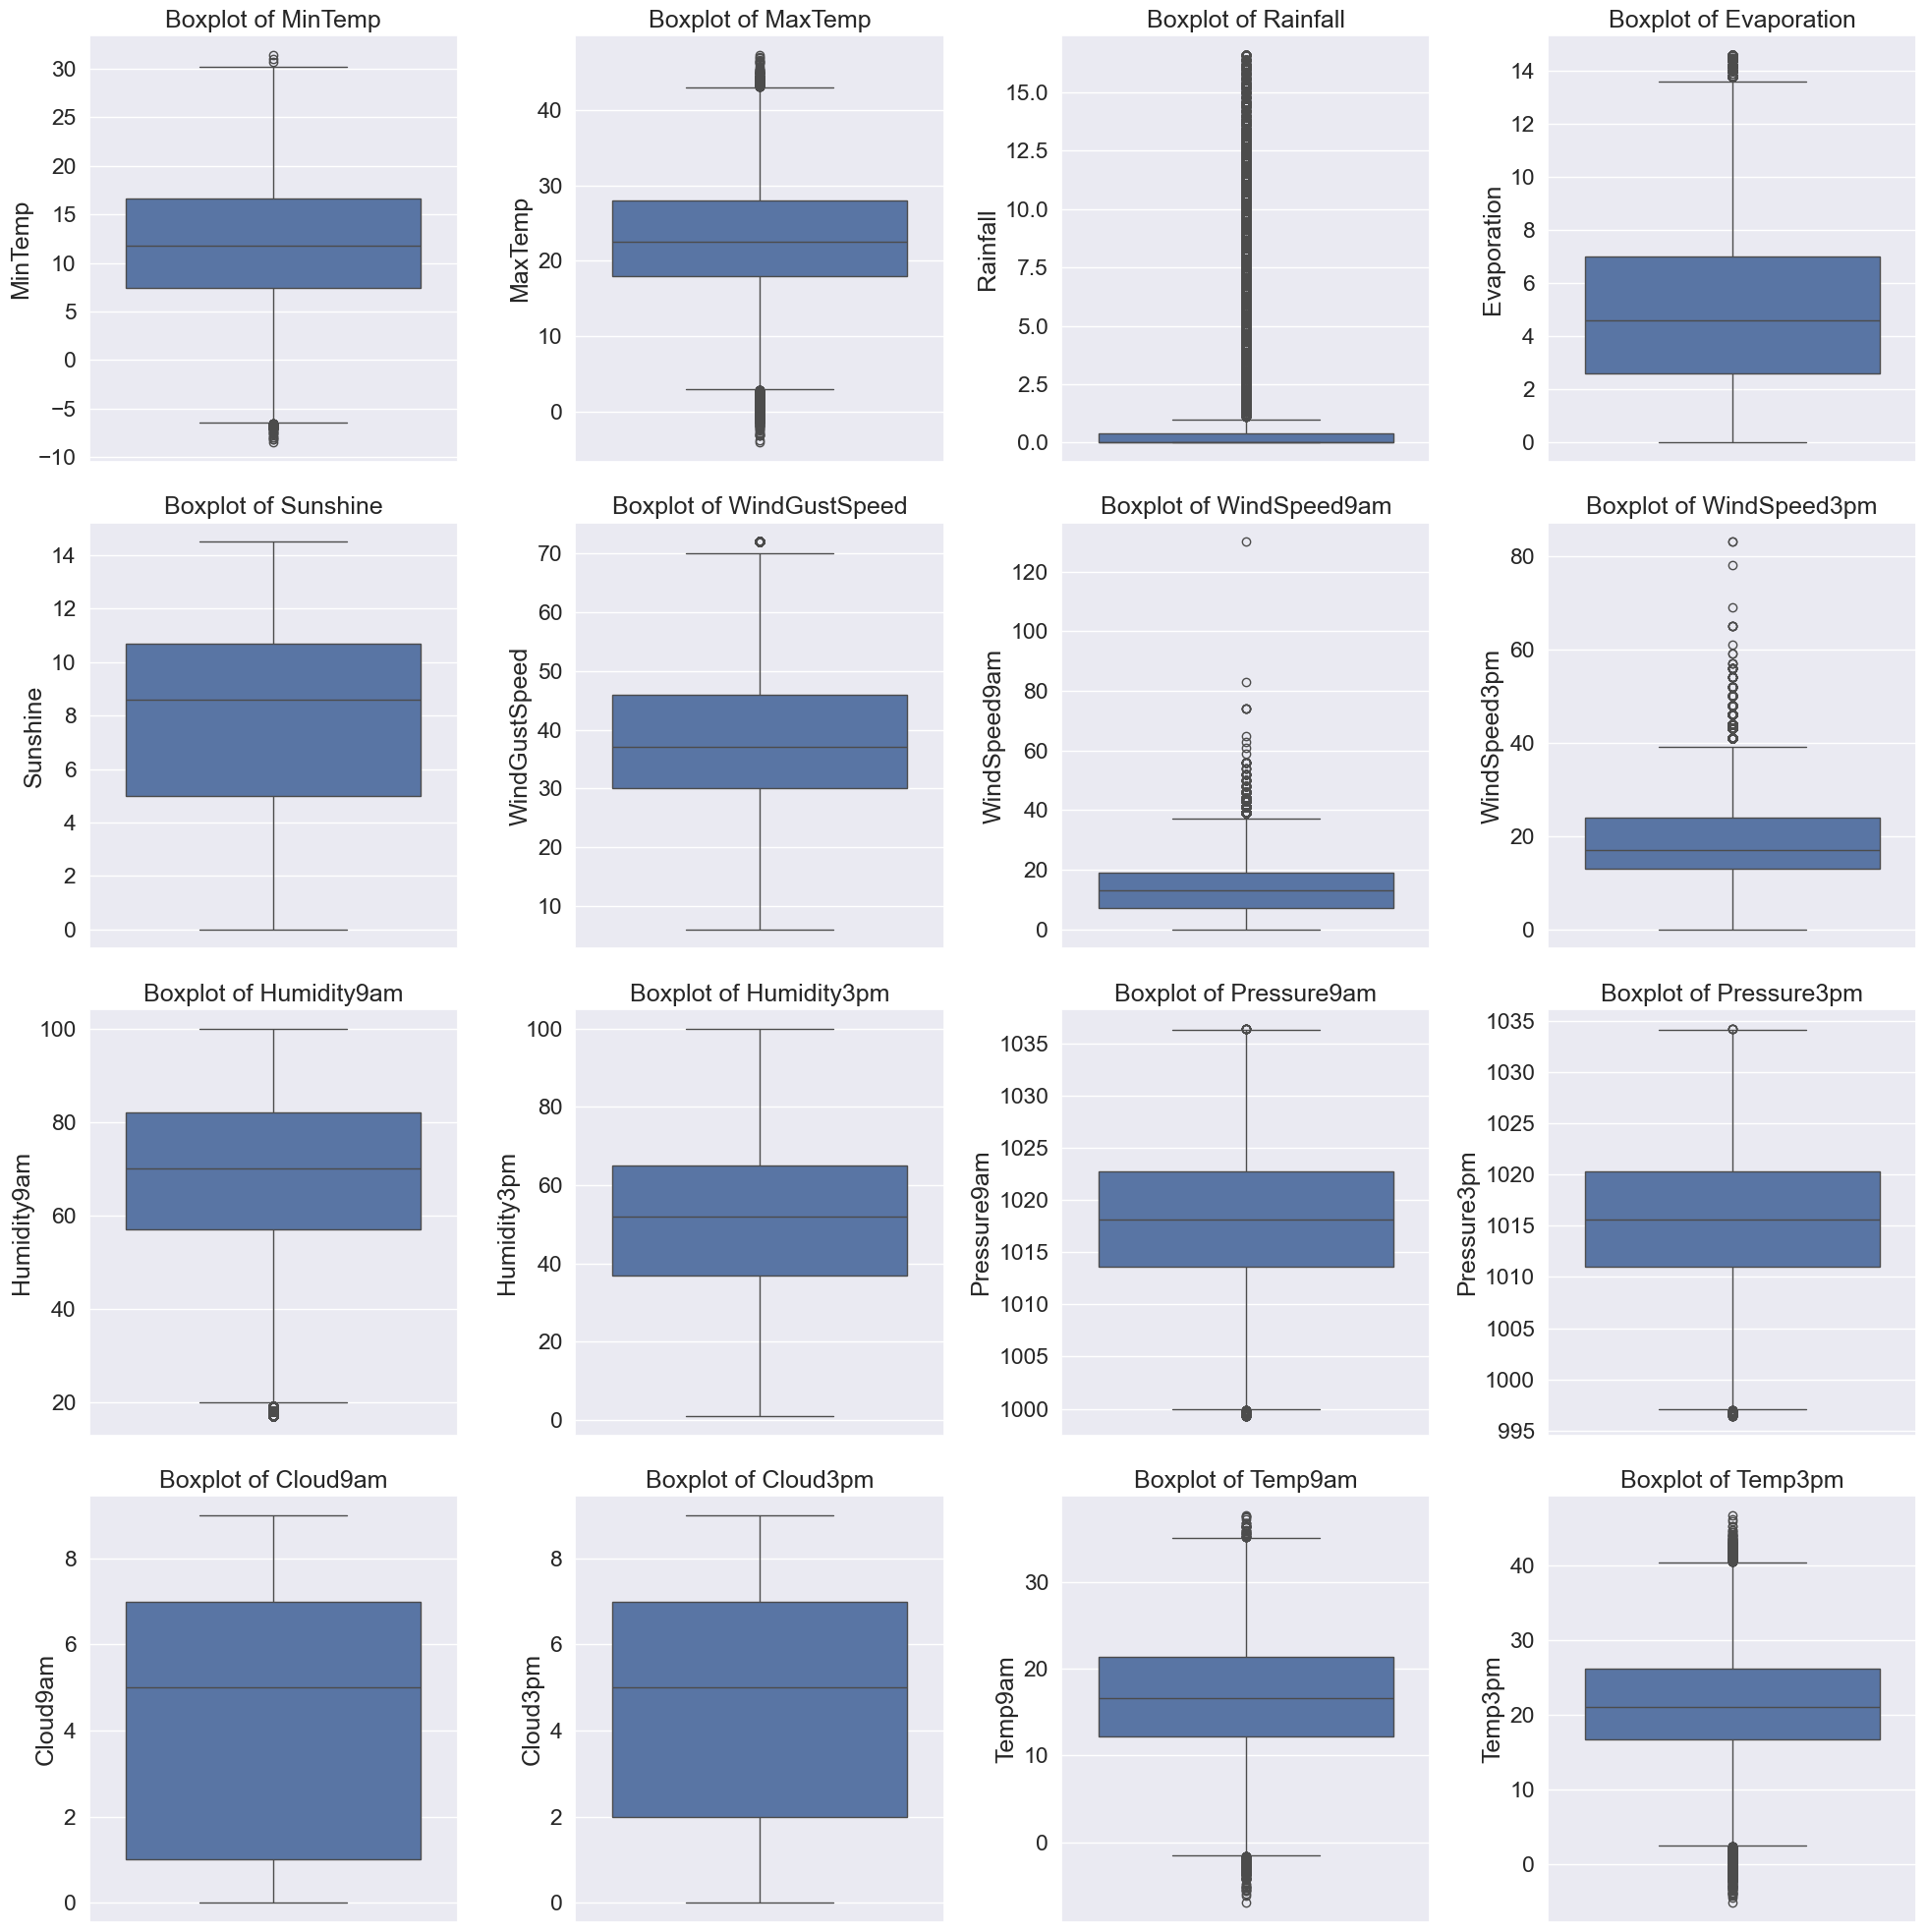

In [29]:
nrows, ncols = 4,4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20)

axs = axs.flatten()

for i , col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()

In [30]:
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
RainTomorrow     0.022744
RainToday        0.023478
Rainfall         0.023478
Temp3pm          0.025058
WindDir3pm       0.029829
Humidity3pm      0.031282
WindGustSpeed    0.072786
WindGustDir      0.073220
WindDir9am       0.075931
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

In [31]:
# categorical column의 null 비율
df[cat_cols].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainTomorrow    0.022744
RainToday       0.023478
WindDir3pm      0.029829
WindGustDir     0.073220
WindDir9am      0.075931
dtype: float64

In [32]:
# numerical column의 null 비율
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
Rainfall         0.023478
Temp3pm          0.025058
Humidity3pm      0.031282
WindGustSpeed    0.072786
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

In [33]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치를 채움
for col in num_cols:
    if df[col].isnull().mean()>0:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)

In [34]:
for col in num_cols:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))
        

In [35]:
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

In [36]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [37]:
# 날짜 column을 drop합니다.
df.drop(['Date'], axis=1, inplace=True)

In [38]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [39]:
df.isnull().mean().sort_values()

Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RainTomorrow     0.022744
dtype: float64

In [41]:
df.dropna(subset=['RainTomorrow'], inplace = True)
df['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
133523    No
133524    No
133525    No
133526    No
133527    No
Name: RainTomorrow, Length: 130492, dtype: object

In [42]:
# Yes/No 값을 0, 1로 변경하기
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [43]:
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [44]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('랜덤 포레스트(Random Forest) Accuracy (After removing Outlier):', score)

랜덤 포레스트(Random Forest) Accuracy (After removing Outlier): 0.8591900072799724


In [47]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     20784
           1       0.77      0.43      0.56      5315

    accuracy                           0.86     26099
   macro avg       0.82      0.70      0.74     26099
weighted avg       0.85      0.86      0.84     26099



In [48]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('SGBoost Accuracy (After removing Outlier):', score)

SGBoost Accuracy (After removing Outlier): 0.8624851526878424


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     20784
           1       0.74      0.51      0.60      5315

    accuracy                           0.86     26099
   macro avg       0.81      0.73      0.76     26099
weighted avg       0.85      0.86      0.85     26099

